In [179]:
import sys
sys.path.append("../")

In [180]:
import numpy as np 		  	   		 	   			     			  	 
import pandas as pd
import datetime as dt
			     			  	 
from util import get_data

In [181]:
import marketsimcode as msc
import TheoreticallyOptimalStrategy as tos

# Part One: Theoritical Optimal Portfolio

In [182]:
def get_final_port_value(df_trades, sv):
    valuez = msc.compute_portvals_from_tradedf(df_trades, sv,0,0)[0]
    return valuez.values[-1]

In [183]:
# Example usage:
df_trades = tos.testPolicy(symbol = "JPM", sd=dt.datetime(2008, 1, 1), ed=dt.datetime(2009,12,31), sv = 100000) 

In [184]:
get_final_port_value(df_trades, 100000)

678610.0

In [185]:
benchmark = df_trades.copy()
benchmark["JPM"] = 0
benchmark["JPM"].iloc[0] = 1000

In [186]:
get_final_port_value(benchmark, 100000)

101230.0

In [187]:
import matplotlib.pyplot as plt

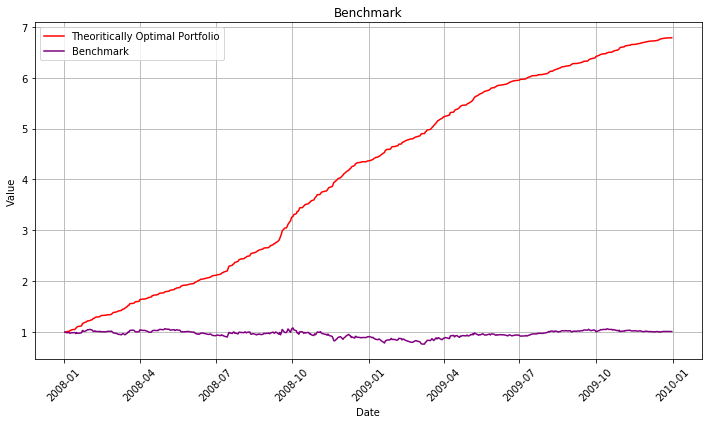

In [188]:
portvals = msc.compute_portvals_from_tradedf(df_trades, 100000,0,0)[0]
benchmark_vals = msc.compute_portvals_from_tradedf(benchmark, 100000,0,0)[0]

# Normalize portvals and benchmark_vals to 1
normalized_portvals = portvals / portvals.iloc[0]
normalized_benchmark_vals = benchmark_vals / benchmark_vals.iloc[0]

# Plotting
# Plotting
plt.figure(figsize=(10, 6))  # Specifies the figure size
plt.plot(normalized_portvals.index, normalized_portvals, label='Theoritically Optimal Portfolio', color='red')
plt.plot(normalized_benchmark_vals.index, normalized_benchmark_vals, label='Benchmark', color='purple')

plt.title('Benchmark')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Value')  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust the layout

# Display the plot
plt.show()

In [189]:
# Convert portvals and benchmark_vals to numpy arrays
portvals_array = portvals.to_numpy()
benchmark_vals_array = benchmark_vals.to_numpy()

# Cumulative return
portfolio_cum_return = (portvals_array[-1] / portvals_array[0]) - 1
benchmark_cum_return = (benchmark_vals_array[-1] / benchmark_vals_array[0]) - 1

# Daily returns
portfolio_daily_returns = np.diff(portvals_array) / portvals_array[:-1]
benchmark_daily_returns = np.diff(benchmark_vals_array) / benchmark_vals_array[:-1]

# Standard deviation of daily returns
portfolio_stdev = np.std(portfolio_daily_returns)
benchmark_stdev = np.std(benchmark_daily_returns)

# Mean of daily returns
portfolio_mean = np.mean(portfolio_daily_returns)
benchmark_mean = np.mean(benchmark_daily_returns)

# Print the results
print("Portfolio Cumulative Return:", portfolio_cum_return)
print("Benchmark Cumulative Return:", benchmark_cum_return)
print("Portfolio Stdev of Daily Returns:", portfolio_stdev)
print("Benchmark Stdev of Daily Returns:", benchmark_stdev)
print("Portfolio Mean of Daily Returns:", portfolio_mean)
print("Benchmark Mean of Daily Returns:", benchmark_mean)

Portfolio Cumulative Return: 5.7861
Benchmark Cumulative Return: 0.012299999999999978
Portfolio Stdev of Daily Returns: 0.004543309228361048
Benchmark Stdev of Daily Returns: 0.016987488484155374
Portfolio Mean of Daily Returns: 0.0038167861508578245
Benchmark Mean of Daily Returns: 0.0001680869781909422


# Part Two: Indicators

In [190]:
from util import get_data

In [191]:
# TODO get price table
sd=dt.datetime(2008, 1, 1)
ed=dt.datetime(2009,2,1)
AAPL_DATA = get_data(['AAPL'], dates=pd.date_range(sd,ed), addSPY=False).dropna()

AAPL_DATA

,AAPL
2008-01-02,194.01
2008-01-03,194.10
2008-01-04,179.28
2008-01-07,176.88
2008-01-08,170.52
2008-01-09,178.63
2008-01-10,177.26
2008-01-11,171.95
2008-01-14,178.02
2008-01-15,168.32


In [192]:
def compute_sma(price_data, period):
    return price_data.rolling(window=period).mean()

In [193]:
def boilinger_bands(price_data):
    middle_band = price_data.rolling(window=20).mean()
    bb_std = sma_20.std()
    
    upper_band = middle_band + (2 * bb_std)
    lower_band = middle_band + (2 * bb_std)
    
    return lower_band, middle_band, upper_band

In [194]:
def rate_of_change(price_data, n_periods):
    close_n_periods_ago = price_data.shift(n_periods)
    roc = ((price_data - close_n_periods_ago) / close_n_periods_ago)
    return roc

In [208]:
def EMA(prices_df, days):
    ema_df = prices_df.copy()
    
    prices = prices_df.values
    smoothing = 2 / (days + 1)
    ema = np.zeros(prices.shape[0])
    ema[0] = prices[0][0]

    for i in range(1, len(prices)):
        ema[i] = (prices[i] * smoothing) + (ema[i - 1] * (1 - smoothing))

    return ema_df

In [209]:
EMA(AAPL_DATA, 20)

,AAPL
2008-01-02,194.01
2008-01-03,194.10
2008-01-04,179.28
2008-01-07,176.88
2008-01-08,170.52
2008-01-09,178.63
2008-01-10,177.26
2008-01-11,171.95
2008-01-14,178.02
2008-01-15,168.32


In [196]:
# PPI
def PPO(prices_df):
    short_period = 12
    long_period = 26
    
    # Calculate short-term EMA
    EMA_short = EMA(prices_df, short_period)
    
    # Calculate long-term EMA
    EMA_long = EMA(prices_df, long_period)
    
    # Calculate PPO
    PPO_values = [(short - long) / long * 100 for short, long in zip(EMA_short, EMA_long)]
    Signal_Line = EMA(prices_df, 9)
    
    return PPO_values, Signal_Line

In [199]:
def stochastic_K(high, low, close):
    # Calculate L14 and H14
    L14 = low.rolling(window=14).min()
    H14 = high.rolling(window=14).max()
    
    # Calculate %K
    percent_K = ((close - L14) / (H14 - L14)) * 100
    
    return percent_K

def stochastic_D(percent_K):
    # Calculate %D
    percent_D = percent_K.rolling(window=3).mean()
    
    return percent_D

In [198]:
# TODO get price table
sd=dt.datetime(2008, 1, 1)
ed=dt.datetime(2009,2,1)

AAPL_DATA_HIGH = get_data(['AAPL'], dates=pd.date_range(sd,ed), addSPY=False, colname="High").dropna()
AAPL_DATA_LOW = get_data(['AAPL'], dates=pd.date_range(sd,ed), addSPY=False, colname="Low").dropna()
AAPL_DATA_CLOSE = get_data(['AAPL'], dates=pd.date_range(sd,ed), addSPY=False, colname="Close").dropna()

In [ ]:
import matplotlib.pyplot as plt

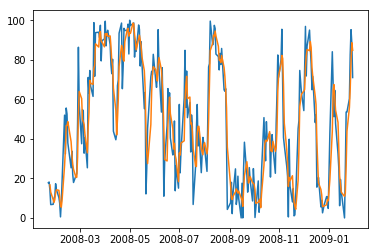

In [215]:
import matplotlib
K = stochastic_K(AAPL_DATA_HIGH, AAPL_DATA_LOW, AAPL_DATA_CLOSE)
D = stochastic_D(K)
plt.plot(K)
plt.plot(D)